# Visualization of MEG Resting State Connectivity Matrices

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Load matrices and add resting state network assignment

In [11]:
# Initial parameters
sub = 'sub-0006'
freq_band = 'alpha' 
matrix_type = 'validation'
# Load csv
aec_matrix = pd.read_csv('output/csv_matrices/' + sub + '_aecMatrix_' + matrix_type + '.csv', 
                         names = ['source', 'target', 'corr', 'freq_band'])

# Add resting state network assignment
aec_matrix.loc[:, 'rsn_srce'] = 'temp'
aec_matrix.loc[:, 'rsn_trgt'] = 'temp'
aec_matrix = aec_matrix.loc[aec_matrix['freq_band'] == freq_band]

# Add RSN based on source
dmn = ['bankssts L', 'caudalmiddlefrontal L', 'inferiorparietal L', 'inferiorparietal R', 'isthmuscingulate L', 'isthmuscingulate R',
       'middletemporal L', 'middletemporal R', 'parahippocampal L', 'parsorbitalis L', 'parsorbitalis R', 'parstriangularis L',
       'precuneus L', 'precuneus R', 'rostralanteriorcingulate L', 'rostralanteriorcingulate R', 'superiorfrontal L', 'superiorfrontal R']

dorsal_attention = ['superiorparietal L', 'superiorparietal R']

frontoparietal = ['caudalmiddlefrontal R', 'rostralmiddlefrontal L', 'rostralmiddlefrontal R']

limbic = ['entorhinal L', 'entorhinal R', 'frontalpole L', 'frontalpole R', 'inferiortemporal L', 'inferiortemporal R',
          'lateralorbitofrontal L', 'lateralorbitofrontal R', 'medialorbitofrontal L', 'medialorbitofrontal R', 'temporalpole L',
          'temporalpole R']

somatomotor = ['bankssts R', 'paracentral L', 'paracentral R', 'postcentral L', 'postcentral R', 'precentral L', 'precentral R',
               'superiortemporal L', 'superiortemporal R', 'transversetemporal L', 'transversetemporal R']

ventral_attention = ['caudalanteriorcingulate L', 'caudalanteriorcingulate R', 'insula L', 'insula R', 'parsopercularis L', 
                     'parsopercularis R', 'parstriangularis R', 'posteriorcingulate L', 'posteriorcingulate R', 'supramarginal L',
                     'supramarginal R']

visual = ['cuneus L', 'cuneus R', 'fusiform L', 'fusiform R', 'lateraloccipital L', 'lateraloccipital R', 'lingual L', 'lingual R',
          'parahippocampal R', 'pericalcarine L', 'pericalcarine R']

for iSource in range(len(aec_matrix)):
    if aec_matrix.iloc[iSource, 0] in dmn:
        aec_matrix.iloc[iSource, 4] = 'dmn'
    elif aec_matrix.iloc[iSource, 0] in dorsal_attention:
        aec_matrix.iloc[iSource, 4] = 'dorsal_attention'
    elif aec_matrix.iloc[iSource, 0] in frontoparietal:
        aec_matrix.iloc[iSource, 4] = 'frontoparietal'
    elif aec_matrix.iloc[iSource, 0] in limbic:
        aec_matrix.iloc[iSource, 4] = 'limbic'
    elif aec_matrix.iloc[iSource, 0] in somatomotor:
        aec_matrix.iloc[iSource, 4] = 'somatomotor'
    elif aec_matrix.iloc[iSource, 0] in ventral_attention:
        aec_matrix.iloc[iSource, 4] = 'ventral_attention'
    else: 
        aec_matrix.iloc[iSource, 4] = 'visual'
        
for iTarget in range(len(aec_matrix)):
    if aec_matrix.iloc[iTarget, 1] in dmn:
        aec_matrix.iloc[iTarget, 5] = 'dmn'
    elif aec_matrix.iloc[iTarget, 1] in dorsal_attention:
        aec_matrix.iloc[iTarget, 5] = 'dorsal_attention'
    elif aec_matrix.iloc[iTarget, 1] in frontoparietal:
        aec_matrix.iloc[iTarget, 5] = 'frontoparietal'
    elif aec_matrix.iloc[iTarget, 1] in limbic:
        aec_matrix.iloc[iTarget, 5] = 'limbic'
    elif aec_matrix.iloc[iTarget, 1] in somatomotor:
        aec_matrix.iloc[iTarget, 5] = 'somatomotor'
    elif aec_matrix.iloc[iTarget, 1] in ventral_attention:
        aec_matrix.iloc[iTarget, 5] = 'ventral_attention'
    else: 
        aec_matrix.iloc[iTarget, 5] = 'visual'
    
aec_matrix.head(10)

,source,target,corr,freq_band,rsn_srce,rsn_trgt
9248,bankssts L,bankssts L,1.000000,alpha,dmn,dmn
9249,bankssts L,bankssts R,0.062188,alpha,dmn,somatomotor
9250,bankssts L,caudalanteriorcingulate L,-0.019294,alpha,dmn,ventral_attention
9251,bankssts L,caudalanteriorcingulate R,0.003227,alpha,dmn,ventral_attention
9252,bankssts L,caudalmiddlefrontal L,0.001544,alpha,dmn,dmn
9253,bankssts L,caudalmiddlefrontal R,0.037693,alpha,dmn,frontoparietal
9254,bankssts L,cuneus L,0.032710,alpha,dmn,visual
9255,bankssts L,cuneus R,0.011648,alpha,dmn,visual
9256,bankssts L,entorhinal L,0.053430,alpha,dmn,limbic
9257,bankssts L,entorhinal R,0.035551,alpha,dmn,limbic


### Plot connectivity matrix (Desikan-Killiany)

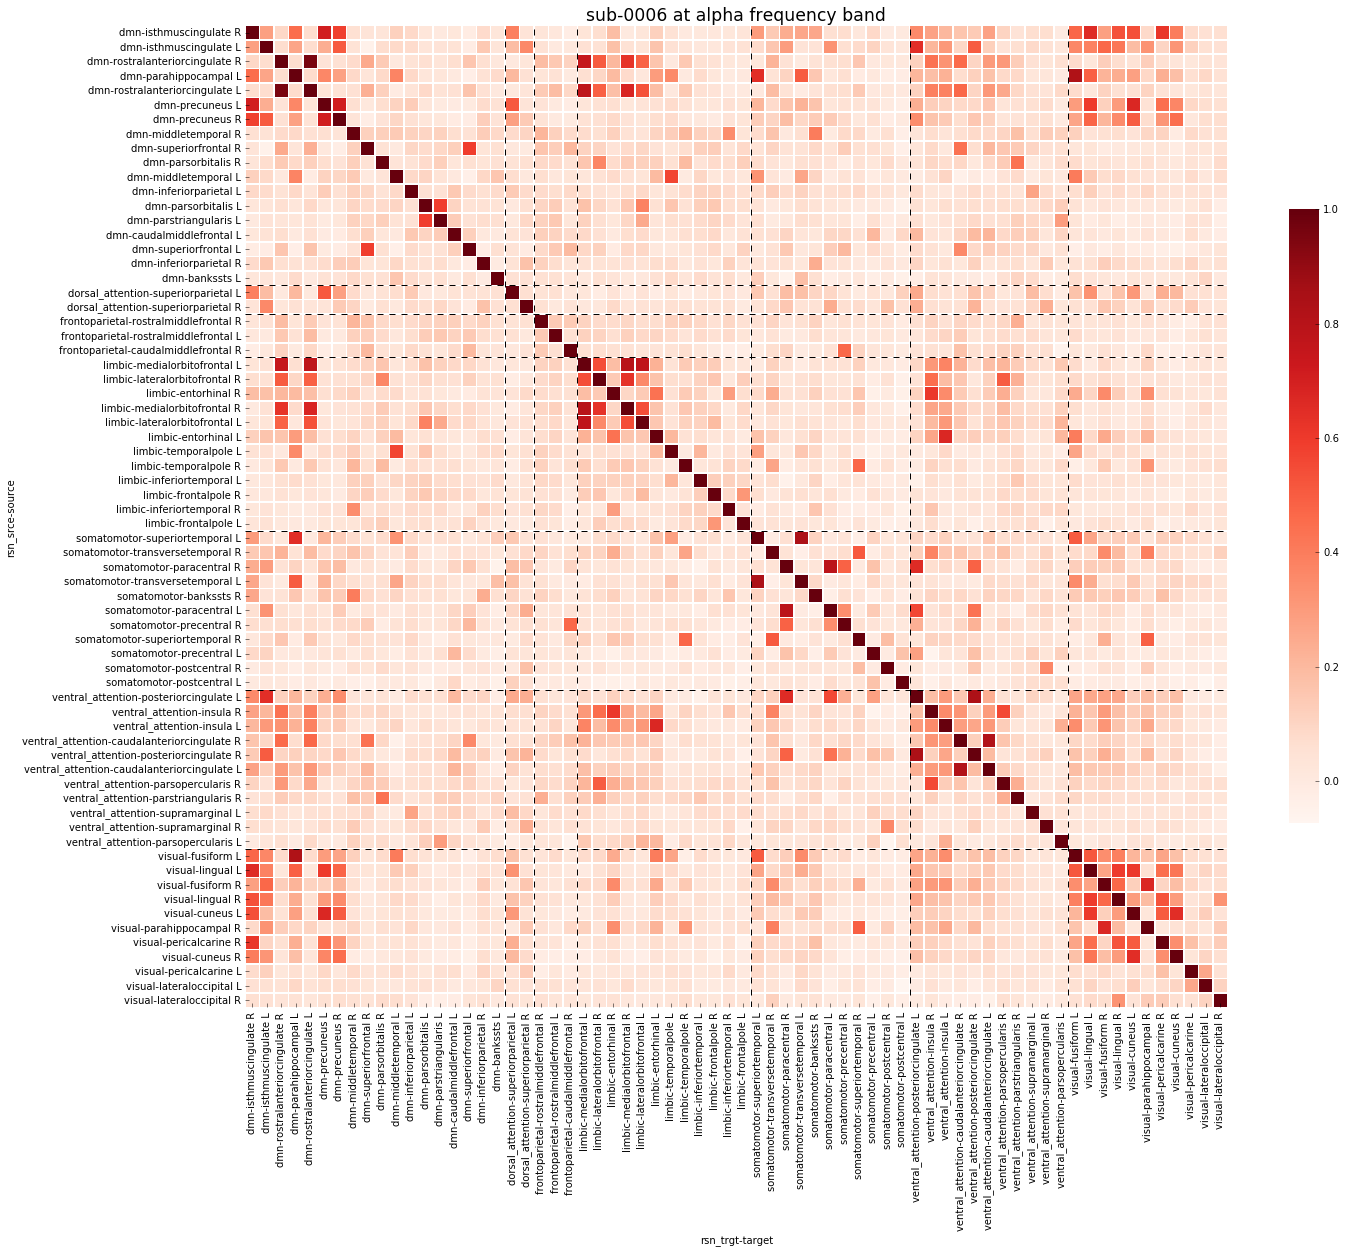

In [15]:
# Go from table to matrix form
aec_temp = aec_matrix.pivot_table(index=['rsn_srce', 'source'], columns= ['rsn_trgt', 'target'], values='corr')

# Create a mean column to order nodes based on node strength
aec_temp['mean'] = aec_temp.as_matrix().mean(axis = 1)
temp_row = aec_temp.reset_index().sort_values(['rsn_srce','mean'], ascending=[True,False], kind='mergesort').set_index(['rsn_srce','source'])
aec_plot = temp_row[temp_row.index.tolist()]

# Set diagonal to zero to bring out patterns
# np.fill_diagonal(aec_plot.values, 0)

# Draw the full plot
f, ax = plt.subplots(figsize=(22, 22))
sns.heatmap(aec_plot, cmap='Reds', square=True, linewidths=.5, 
            cbar_kws={"shrink": .5})
ax.hlines([18, 20, 23, 35, 46, 57], *ax.get_xlim(), linestyles = 'dashed')
ax.vlines([18, 20, 23, 35, 46, 57], *ax.get_ylim(), linestyles = 'dashed')
plt.title('%s at %s frequency band' % (sub, freq_band), size = 'xx-large')

### Plot connectivity matrix (Resting State Networks)

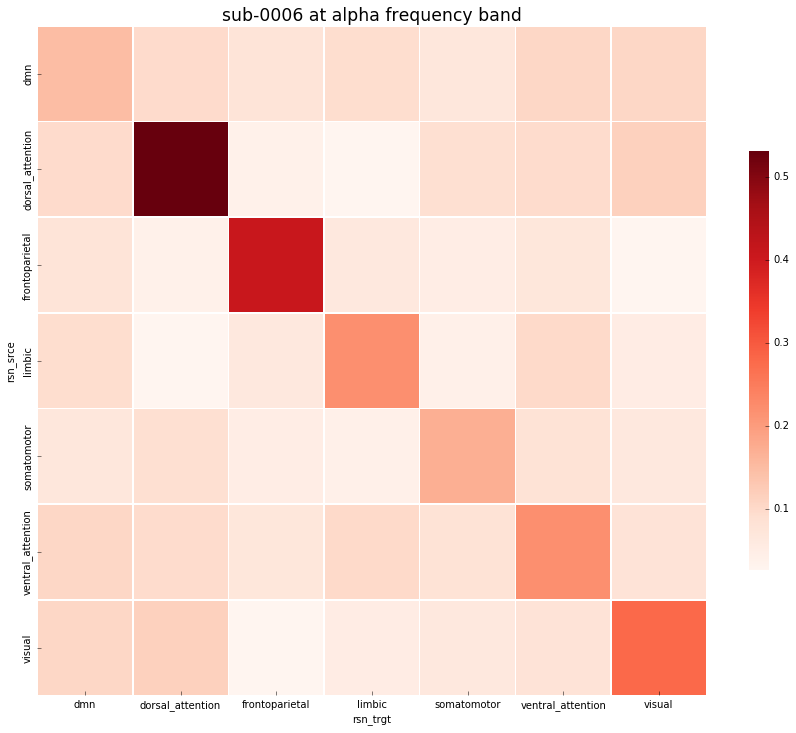

In [13]:
# Data wranling to get mean within each resting state network
aec_temp = aec_matrix.pivot_table(index=['rsn_srce', 'source'], columns= ['rsn_trgt', 'target'], values='corr')
aec_rsn = aec_temp.mean(level= 'rsn_srce').transpose().mean(level= 'rsn_trgt').transpose()

# Draw the full plot
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(aec_rsn, cmap='Reds', square=True, linewidths=.5, 
            cbar_kws={"shrink": .5})
plt.title('%s at %s frequency band' % (sub, freq_band), size = 'xx-large')